In [1]:
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, threshold=50)

In [32]:
import imageio

img_arr = imageio.imread("../pytorch_dlwpt-code-master/data/p1ch4/image-dog/bobby.jpg")
img_arr

/tmp/ipykernel_52015/2771630986.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread("../pytorch_dlwpt-code-master/data/p1ch4/image-dog/bobby.jpg")


array([[[ 77,  45,  22],
        [ 77,  45,  22],
        [ 78,  46,  21],
        ...,
        [118,  78,  52],
        [117,  77,  51],
        [116,  76,  51]],

       [[ 75,  43,  20],
        [ 76,  44,  21],
        [ 77,  45,  20],
        ...,
        [118,  78,  52],
        [117,  77,  51],
        [116,  76,  50]],

       [[ 74,  39,  17],
        [ 75,  41,  16],
        [ 77,  43,  18],
        ...,
        [119,  80,  51],
        [117,  77,  51],
        [116,  76,  50]],

       ...,

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [172, 122,  51],
        [174, 124,  53],
        [174, 124,  53]],

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [173, 123,  54],
        [174, 124,  55],
        [174, 124,  55]],

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [159, 108,  42],
        [158, 107,  41],
        [158, 107,  41]]

In [5]:
from PIL import Image

img_arr = Image.open("../pytorch_dlwpt-code-master/data/p1ch4/image-dog/bobby.jpg")
img_arr.size

(1280, 720)

In [6]:
import cv2

img_arr = cv2.imread("../pytorch_dlwpt-code-master/data/p1ch4/image-dog/bobby.jpg")
img_arr.shape

(720, 1280, 3)

In [10]:
img = torch.from_numpy(img_arr)
img.shape
out = img.permute(2, 0, 1)
out.shape

torch.Size([3, 720, 1280])

In [13]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
batch.shape

torch.Size([3, 3, 256, 256])

In [22]:
import os

data_dir = "../pytorch_dlwpt-code-master/data/p1ch4/image-cats/"

filename = [
    name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == ".png"
]
filename

for i, filename in enumerate(filename):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    batch[i] = img_t

/tmp/ipykernel_52015/113059091.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


In [23]:
batch[1]

tensor([[[202, 193,  ...,  13,  12],
         [199, 192,  ...,  14,  14],
         ...,
         [ 75,  68,  ...,  36,  37],
         [ 85, 103,  ...,  37,  38]],

        [[151, 139,  ...,   9,   8],
         [151, 140,  ...,  11,  11],
         ...,
         [ 33,  26,  ...,  26,  27],
         [ 40,  58,  ...,  27,  28]],

        [[ 68,  53,  ...,   6,   5],
         [ 67,  54,  ...,   6,   6],
         ...,
         [ 11,   2,  ...,  17,  18],
         [ 19,  37,  ...,  18,  19]]], dtype=torch.uint8)

In [24]:
batch = batch.float()
batch /= 255.0

In [31]:
n_channels = batch.shape[1]
n_channels
for c in range(n_channels):
    # print(batch[:, c])
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In [34]:
import imageio
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, threshold=50)

dir_path = (
    "../pytorch_dlwpt-code-master/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
)

vol_arr = imageio.volread(dir_path, "DICOM")
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)

99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


(99, 512, 512)

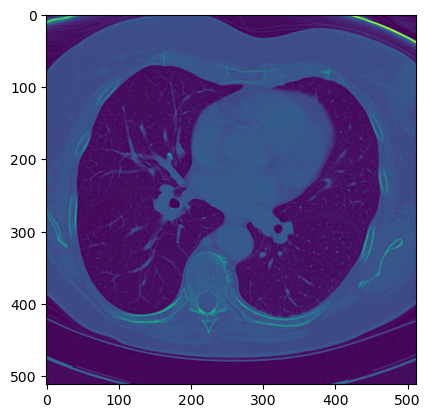

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[49])